In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
files = 86 # number of solution files to process
dataset = pd.read_csv('dataset.csv')

df_name = 'TS{}_solution.dat'
df_list = []
for i in range(0,files):
     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue 
     df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5","6"]))

topo_name = 'TS{}.topo'
topo_list = []
for i in range(0,files):
     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue
     topo_list.append(pd.read_csv(topo_name.format(i), sep = '\t'))

par_name = 'TS{}_parameters.dat'
par_list = []
for i in range(0,files):
     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue
     par_list.append(pd.read_csv(par_name.format(i), sep="\t", header=None))

cfg_name = 'TS{}.cfg'
cfg_list = []
for i in range(0,files):
     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue
     cfg_list.append(open(cfg_name.format(i)))

for j in range(len(topo_list)):
     
     cfg = cfg_list[j]
     lines = cfg.readlines()
     col1 = lines[31][2]; col2 = lines[32][2]; col3 = lines[33][2]; col4 = lines[34][2]; col5 = lines[35][2]; col6 = lines[36][2]

     topo = topo_list[j]
     df1 = df_list[j]
     par = par_list[j]
     par = par[[1,2,3,4,5,6,7,8,9,10,11,12,13]]
     par = par.rename(columns = {1: 'states', 2: col1+'p', 3: col2+'p', 4: col3+'p', 5: col4+'p', 6: col5+'p', 7: col6+'p', 8: col1+'d', 9: col2+'d', 10: col3+'d', 11: col4+'d', 12: col5+'d', 13: col6+'d'})
     temp_states = df1['states']

     ab = bc = cd = de = ef = fa = ea = ac = ad = fb = cf = fd = bd = be = ec = 0
     for i in range (len(topo)):
          if topo['Source'][i] == 'A' and topo['Target'][i] == 'B': ab = 1
          if topo['Source'][i] == 'B' and topo['Target'][i] == 'C': bc = 1
          if topo['Source'][i] == 'C' and topo['Target'][i] == 'D': cd = 1
          if topo['Source'][i] == 'D' and topo['Target'][i] == 'E': de = 1
          if topo['Source'][i] == 'E' and topo['Target'][i] == 'F': ef = 1
          if topo['Source'][i] == 'F' and topo['Target'][i] == 'A': fa = 1
          if topo['Source'][i] == 'A' and topo['Target'][i] == 'C': ac = 1
          if topo['Source'][i] == 'B' and topo['Target'][i] == 'D': bd = 1
          if topo['Source'][i] == 'E' and topo['Target'][i] == 'C': ec = 1
          if topo['Source'][i] == 'F' and topo['Target'][i] == 'D': fd = 1
          if topo['Source'][i] == 'E' and topo['Target'][i] == 'A': ea = 1
          if topo['Source'][i] == 'F' and topo['Target'][i] == 'B': fb = 1
          if topo['Source'][i] == 'A' and topo['Target'][i] == 'D': ad = 1
          if topo['Source'][i] == 'B' and topo['Target'][i] == 'E': be = 1
          if topo['Source'][i] == 'C' and topo['Target'][i] == 'F': cf = 1
     
     # if ab == 0 or bc == 0 or cd == 0 or de == 0 or ef == 0 or fa == 0: continue

     # production/degradation normalization and z normalization of the sultion file
     df2 = np.array(df1.drop(['serial','states'], axis = 'columns'))
     df2 = 2**df2

     dfp = []
     dfd = []
     for i in range(len(df1)):
          temp1 = []
          temp1.append(par[col1+'p'][df1.serial[i]-1])
          temp1.append(par[col2+'p'][df1.serial[i]-1])
          temp1.append(par[col3+'p'][df1.serial[i]-1])
          temp1.append(par[col4+'p'][df1.serial[i]-1])
          temp1.append(par[col5+'p'][df1.serial[i]-1])
          temp1.append(par[col6+'p'][df1.serial[i]-1])
          dfp.append(temp1)

          temp2 = []
          temp2.append(par[col1+'d'][df1.serial[i]-1])
          temp2.append(par[col2+'d'][df1.serial[i]-1])
          temp2.append(par[col3+'d'][df1.serial[i]-1])
          temp2.append(par[col4+'d'][df1.serial[i]-1])
          temp2.append(par[col5+'d'][df1.serial[i]-1])
          temp2.append(par[col6+'d'][df1.serial[i]-1])
          dfd.append(temp2)

     dfp = np.array(dfp)
     dfd = np.array(dfd)
     dfpbyd = dfp/dfd

     df2 = df2/dfpbyd
     df2 = np.log2(df2)
     df3 = np.sum(df2, axis = 0)
     df3 = df3/(len(df2))
     df2 = df2-df3
     
     df1 = pd.DataFrame(df2, columns=[col1+'1',col2+'1',col3+'1',col4+'1',col5+'1',col6+'1'])
# a1 being of size 10 is for all the different stable-states (monostable,bistable etc) to reside in a1[0],a1[1] and so on
     a1=[0]*10; a2=[0]*10; a3=[0]*10; a4=[0]*10; a5=[0]*10; a6=[0]*10; a7=[0]*10; a8=[0]*10; a9=[0]*10; a10=[0]*10; a11=[0]*10; a12=[0]*10; a13=[0]*10; a14=[0]*10; a15=[0]*10; a16=[0]*10; a17=[0]*10; a18=[0]*10; a19=[0]*10; a20=[0]*10
     b1=[0]*10; b2=[0]*10; b3=[0]*10; b4=[0]*10; b5=[0]*10; b6=[0]*10; b7=[0]*10; b8=[0]*10; b9=[0]*10; b10=[0]*10; b11=[0]*10; b12=[0]*10; b13=[0]*10; b14=[0]*10; b15=[0]*10; b16=[0]*10; b17=[0]*10; b18=[0]*10; b19=[0]*10; b20=[0]*10
     c1=[0]*10; c2=[0]*10; c3=[0]*10; c4=[0]*10; c5=[0]*10; c6=[0]*10; c7=[0]*10; c8=[0]*10; c9=[0]*10; c10=[0]*10; c11=[0]*10; c12=[0]*10; c13=[0]*10; c14=[0]*10; c15=[0]*10; c16=[0]*10; c17=[0]*10; c18=[0]*10; c19=[0]*10; c20=[0]*10
     d1=[0]*10; d2=[0]*10; d3=[0]*10; d4=[0]*10; d5=[0]*10; d6=[0]*10; d7=[0]*10; d8=[0]*10; d9=[0]*10; d10=[0]*10; d11=[0]*10; d12=[0]*10; d13=[0]*10; d14=[0]*10; d15=[0]*10; d16=[0]*10; d17=[0]*10; d18=[0]*10; d19=[0]*10; d20=[0]*10
     e1=[0]*10; e2=[0]*10; e3=[0]*10; e4=[0]*10; e5=[0]*10; e6=[0]*10; e7=[0]*10; e8=[0]*10; e9=[0]*10; e10=[0]*10; e11=[0]*10; e12=[0]*10; e13=[0]*10; e14=[0]*10; e15=[0]*10; e16=[0]*10; e17=[0]*10; e18=[0]*10; e19=[0]*10; e20=[0]*10
     at = 0
     bt = 0
     ct = 0
     dt = 0
     et = 0
     ft = 0

     for i in range(len(df1)):
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: a1[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: a2[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: a3[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: a4[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: a5[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: a6[temp_states[i]-1]+=1

          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: b2[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: b1[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: b3[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: b4[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: b5[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: b6[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: b7[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: b8[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: b9[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: b10[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: b11[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: b12[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: b13[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: b14[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: b15[temp_states[i]-1]+=1

          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]<ft: c1[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: c2[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: c3[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: c4[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: c5[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: c6[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: c7[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: c8[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: c9[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: c10[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: c11[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: c12[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: c13[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: c14[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: c15[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: c16[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: c17[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: c18[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: c19[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: c20[temp_states[i]-1]+=1
          
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]<ft: d1[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]<ft: d2[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]<et and df1.F1[i]>ft: d3[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: d4[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: d5[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: d6[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: d7[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: d8[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: d9[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: d10[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: d11[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: d12[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: d13[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: d14[temp_states[i]-1]+=1
          if df1.A1[i]<at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: d15[temp_states[i]-1]+=1

          if df1.A1[i]<at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: e1[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]<bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: e2[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]<ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]>ft: e3[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]<dt and df1.E1[i]>et and df1.F1[i]>ft: e4[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]<et and df1.F1[i]>ft: e5[temp_states[i]-1]+=1
          if df1.A1[i]>at and df1.B1[i]>bt and df1.C1[i]>ct and df1.D1[i]>dt and df1.E1[i]>et and df1.F1[i]<ft: e6[temp_states[i]-1]+=1

     pd.set_option('display.max_rows',500)
     data = {'A': [1,0,0,0,0,0], 'B': [0,1,0,0,0,0], 'C': [0,0,1,0,0,0], 'D': [0,0,0,1,0,0], 'E': [0,0,0,0,1,0], 'F': [0,0,0,0,0,1], 'freq1': [a1[0],a2[0],a3[0],a4[0],a5[0],a6[0]], 'freq2': [a1[1],a2[1],a3[1],a4[1],a5[1],a6[1]], 'freq3': [a1[2],a2[2],a3[2],a4[2],a5[2],a6[2]], 'freq4': [a1[3],a2[3],a3[3],a4[3],a5[3],a6[3]], 'freq5': [a1[4],a2[4],a3[4],a4[4],a5[4],a6[4]], 'freq6': [a1[5],a2[5],a3[5],a4[5],a5[5],a6[5]], 'freq7': [a1[6],a2[6],a3[6],a4[6],a5[6],a6[6]], 'freq8': [a1[7],a2[7],a3[7],a4[7],a5[7],a6[7]], 'freq9': [a1[8],a2[8],a3[8],a4[8],a5[8],a6[8]], 'freq10': [a1[9],a2[9],a3[9],a4[9],a5[9],a6[9]]}
     out5 = pd.DataFrame(data)
     # print (out5)
     data = {'A': [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0], 'B': [1,0,0,0,0,1,1,1,1,0,0,0,0,0,0], 'C': [0,1,0,0,0,1,0,0,0,1,1,1,0,0,0], 'D': [0,0,1,0,0,0,1,0,0,1,0,0,1,1,0], 'E': [0,0,0,1,0,0,0,1,0,0,1,0,1,0,1], 'F': [0,0,0,0,1,0,0,0,1,0,0,1,0,1,1], 'freq1': [b1[0],b2[0],b3[0],b4[0],b5[0],b6[0],b7[0],b8[0],b9[0],b10[0],b11[0],b12[0],b13[0],b14[0],b15[0]], 'freq2': [b1[1],b2[1],b3[1],b4[1],b5[1],b6[1],b7[1],b8[1],b9[1],b10[1],b11[1],b12[1],b13[1],b14[1],b15[1]], 'freq3': [b1[2],b2[2],b3[2],b4[2],b5[2],b6[2],b7[2],b8[2],b9[2],b10[2],b11[2],b12[2],b13[2],b14[2],b15[2]], 'freq4': [b1[3],b2[3],b3[3],b4[3],b5[3],b6[3],b7[3],b8[3],b9[3],b10[3],b11[3],b12[3],b13[3],b14[3],b15[3]], 'freq5': [b1[4],b2[4],b3[4],b4[4],b5[4],b6[4],b7[4],b8[4],b9[4],b10[4],b11[4],b12[4],b13[4],b14[4],b15[4]], 'freq6': [b1[5],b2[5],b3[5],b4[5],b5[5],b6[5],b7[5],b8[5],b9[5],b10[5],b11[5],b12[5],b13[5],b14[5],b15[5]], 'freq7': [b1[6],b2[6],b3[6],b4[6],b5[6],b6[6],b7[6],b8[6],b9[6],b10[6],b11[6],b12[6],b13[6],b14[6],b15[6]], 'freq8': [b1[7],b2[7],b3[7],b4[7],b5[7],b6[7],b7[7],b8[7],b9[7],b10[7],b11[7],b12[7],b13[7],b14[7],b15[7]], 'freq9': [b1[8],b2[8],b3[8],b4[8],b5[8],b6[8],b7[8],b8[8],b9[8],b10[8],b11[8],b12[8],b13[8],b14[8],b15[8]], 'freq10': [b1[9],b2[9],b3[9],b4[9],b5[9],b6[9],b7[9],b8[9],b9[9],b10[9],b11[9],b12[9],b13[9],b14[9],b15[9]]}
     out5 = pd.concat([pd.DataFrame(data),out5],ignore_index = True)
     # print (out5)
     data = {'A': [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0], 'B': [1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0], 'C': [1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0], 'D': [0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,1], 'E': [0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,1], 'F': [0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,1], 'freq1': [c1[0],c2[0],c3[0],c4[0],c5[0],c6[0],c7[0],c8[0],c9[0],c10[0],c11[0],c12[0],c13[0],c14[0],c15[0],c16[0],c17[0],c18[0],c19[0],c20[0]], 'freq2': [c1[1],c2[1],c3[1],c4[1],c5[1],c6[1],c7[1],c8[1],c9[1],c10[1],c11[1],c12[1],c13[1],c14[1],c15[1],c16[1],c17[1],c18[1],c19[1],c20[1]], 'freq3': [c1[2],c2[2],c3[2],c4[2],c5[2],c6[2],c7[2],c8[2],c9[2],c10[2],c11[2],c12[2],c13[2],c14[2],c15[2],c16[2],c17[2],c18[2],c19[2],c20[2]], 'freq4': [c1[3],c2[3],c3[3],c4[3],c5[3],c6[3],c7[3],c8[3],c9[3],c10[3],c11[3],c12[3],c13[3],c14[3],c15[3],c16[3],c17[3],c18[3],c19[3],c20[3]], 'freq5': [c1[4],c2[4],c3[4],c4[4],c5[4],c6[4],c7[4],c8[4],c9[4],c10[4],c11[4],c12[4],c13[4],c14[4],c15[4],c16[4],c17[4],c18[4],c19[4],c20[4]], 'freq6': [c1[5],c2[5],c3[5],c4[5],c5[5],c6[5],c7[5],c8[5],c9[5],c10[5],c11[5],c12[5],c13[5],c14[5],c15[5],c16[5],c17[5],c18[5],c19[5],c20[5]], 'freq7': [c1[6],c2[6],c3[6],c4[6],c5[6],c6[6],c7[6],c8[6],c9[6],c10[6],c11[6],c12[6],c13[6],c14[6],c15[6],c16[6],c17[6],c18[6],c19[6],c20[6]], 'freq8': [c1[7],c2[7],c3[7],c4[7],c5[7],c6[7],c7[7],c8[7],c9[7],c10[7],c11[7],c12[7],c13[7],c14[7],c15[7],c16[7],c17[7],c18[7],c19[7],c20[7]], 'freq9': [c1[8],c2[8],c3[8],c4[8],c5[8],c6[8],c7[8],c8[8],c9[8],c10[8],c11[8],c12[8],c13[8],c14[8],c15[8],c16[8],c17[8],c18[8],c19[8],c20[8]], 'freq10': [c1[9],c2[9],c3[9],c4[9],c5[9],c6[9],c7[9],c8[9],c9[9],c10[9],c11[9],c12[9],c13[9],c14[9],c15[9],c16[9],c17[9],c18[9],c19[9],c20[9]]}
     out5 = pd.concat([pd.DataFrame(data),out5],ignore_index = True)
     # print (out5)
     data = {'A': [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0], 'B': [1,1,1,1,1,1,0,0,0,0,1,1,1,1,0], 'C': [1,1,1,0,0,0,1,1,1,0,1,1,1,0,1], 'D': [1,0,0,1,1,0,1,1,0,1,1,1,0,1,1], 'E': [0,1,0,1,0,1,1,0,1,1,1,0,1,1,1], 'F': [0,0,1,0,1,1,0,1,1,1,0,1,1,1,1], 'freq1': [d1[0],d2[0],d3[0],d4[0],d5[0],d6[0],d7[0],d8[0],d9[0],d10[0],d11[0],d12[0],d13[0],d14[0],d15[0]], 'freq2': [d1[1],d2[1],d3[1],d4[1],d5[1],d6[1],d7[1],d8[1],d9[1],d10[1],d11[1],d12[1],d13[1],d14[1],d15[1]], 'freq3': [d1[2],d2[2],d3[2],d4[2],d5[2],d6[2],d7[2],d8[2],d9[2],d10[2],d11[2],d12[2],d13[2],d14[2],d15[2]], 'freq4': [d1[3],d2[3],d3[3],d4[3],d5[3],d6[3],d7[3],d8[3],d9[3],d10[3],d11[3],d12[3],d13[3],d14[3],d15[3]], 'freq5': [d1[4],d2[4],d3[4],d4[4],d5[4],d6[4],d7[4],d8[4],d9[4],d10[4],d11[4],d12[4],d13[4],d14[4],d15[4]], 'freq6': [d1[5],d2[5],d3[5],d4[5],d5[5],d6[5],d7[5],d8[5],d9[5],d10[5],d11[5],d12[5],d13[5],d14[5],d15[5]], 'freq7': [d1[6],d2[6],d3[6],d4[6],d5[6],d6[6],d7[6],d8[6],d9[6],d10[6],d11[6],d12[6],d13[6],d14[6],d15[6]], 'freq8': [d1[7],d2[7],d3[7],d4[7],d5[7],d6[7],d7[7],d8[7],d9[7],d10[7],d11[7],d12[7],d13[7],d14[7],d15[7]], 'freq9': [d1[8],d2[8],d3[8],d4[8],d5[8],d6[8],d7[8],d8[8],d9[8],d10[8],d11[8],d12[8],d13[8],d14[8],d15[8]], 'freq10': [d1[9],d2[9],d3[9],d4[9],d5[9],d6[9],d7[9],d8[9],d9[9],d10[9],d11[9],d12[9],d13[9],d14[9],d15[9]]}
     out5 = pd.concat([pd.DataFrame(data),out5],ignore_index = True)
     # print (out5)
     data = {'A': [0,1,1,1,1,1], 'B': [1,0,1,1,1,1], 'C': [1,1,0,1,1,1], 'D': [1,1,1,0,1,1], 'E': [1,1,1,1,0,1], 'F': [1,1,1,1,1,0], 'freq1': [e1[0],e2[0],e3[0],e4[0],e5[0],e6[0]], 'freq2': [e1[1],e2[1],e3[1],e4[1],e5[1],e6[1]], 'freq3': [e1[2],e2[2],e3[2],e4[2],e5[2],e6[2]], 'freq4': [e1[3],e2[3],e3[3],e4[3],e5[3],e6[3]], 'freq5': [e1[4],e2[4],e3[4],e4[4],e5[4],e6[4]], 'freq6': [e1[5],e2[5],e3[5],e4[5],e5[5],e6[5]], 'freq7': [e1[6],e2[6],e3[6],e4[6],e5[6],e6[6]], 'freq8': [e1[7],e2[7],e3[7],e4[7],e5[7],e6[7]], 'freq9': [e1[8],e2[8],e3[8],e4[8],e5[8],e6[8]], 'freq10': [e1[9],e2[9],e3[9],e4[9],e5[9],e6[9]]}
     out5 = pd.concat([pd.DataFrame(data),out5],ignore_index = True)
     out5['AB'] = ab
     out5['BC'] = bc
     out5['CD'] = cd
     out5['DE'] = de
     out5['EF'] = ef
     out5['FA'] = fa
     out5['AC'] = ac
     out5['BD'] = bd
     out5['EC'] = ec
     out5['FD'] = fd
     out5['EA'] = ea
     out5['FB'] = fb
     out5['AD'] = ad
     out5['BE'] = be
     out5['CF'] = cf
     print (out5)
     
     # problematic edges
     pedge_arr = []
     for i in range(len(out5)):
          pedge = 0
          if ab == 1 and out5['A'][i]-out5['B'][i] == 0: pedge += 1 
          if bc == 1 and out5['B'][i]-out5['C'][i] == 0: pedge += 1 
          if cd == 1 and out5['C'][i]-out5['D'][i] == 0: pedge += 1 
          if ef == 1 and out5['E'][i]-out5['F'][i] == 0: pedge += 1 
          if fa == 1 and out5['F'][i]-out5['A'][i] == 0: pedge += 1 
          if ac == 1 and out5['A'][i]-out5['C'][i] == 0: pedge += 1 
          if bd == 1 and out5['B'][i]-out5['D'][i] == 0: pedge += 1 
          if ec == 1 and out5['E'][i]-out5['C'][i] == 0: pedge += 1 
          if de == 1 and out5['D'][i]-out5['E'][i] == 0: pedge += 1 
          if fd == 1 and out5['F'][i]-out5['D'][i] == 0: pedge += 1 
          if ea == 1 and out5['E'][i]-out5['A'][i] == 0: pedge += 1 
          if fb == 1 and out5['F'][i]-out5['B'][i] == 0: pedge += 1 
          if ad == 1 and out5['A'][i]-out5['D'][i] == 0: pedge += 1 
          if be == 1 and out5['B'][i]-out5['E'][i] == 0: pedge += 1 
          if cf == 1 and out5['C'][i]-out5['F'][i] == 0: pedge += 1 
          pedge_arr.append(pedge)
     out5['pedge'] = pedge_arr
     dataset = pd.concat([pd.DataFrame(out5),dataset],ignore_index = True)
# increasing dataset size using symmetry
     for i in range (5):
          temp = out5['F']
          out5['F'] = out5['E']
          out5['E'] = out5['D']
          out5['D'] = out5['C']
          out5['C'] = out5['B']
          out5['B'] = out5['A']
          out5['A'] = temp

          temp = out5['FA']
          out5['FA'] = out5['EF']
          out5['EF'] = out5['DE']
          out5['DE'] = out5['CD']
          out5['CD'] = out5['BC']
          out5['BC'] = out5['AB']
          out5['AB'] = temp

          temp = out5['FB']
          out5['FB'] = out5['EA']
          out5['EA'] = out5['FD']
          out5['FD'] = out5['EC']
          out5['EC'] = out5['BD']
          out5['BD'] = out5['AC']
          out5['AC'] = temp

          temp = out5['CF']
          out5['CF'] = out5['BE']
          out5['BE'] = out5['AD']
          out5['AD'] = temp

          dataset = pd.concat([pd.DataFrame(out5),dataset],ignore_index = True)

dataset.to_csv('dataset.csv')


    A  B  C  D  E  F  freq1  freq2  freq3  freq4  ...  FA  AC  BD  EC  FD  EA  \
0   0  1  1  1  1  1      0      1      9      2  ...   1   0   0   0   0   0   
1   1  0  1  1  1  1      0     10      3      5  ...   1   0   0   0   0   0   
2   1  1  0  1  1  1      1     13     16      7  ...   1   0   0   0   0   0   
3   1  1  1  0  1  1      0      9      6      4  ...   1   0   0   0   0   0   
4   1  1  1  1  0  1      0      0      3      2  ...   1   0   0   0   0   0   
5   1  1  1  1  1  0      0     35     52     11  ...   1   0   0   0   0   0   
6   1  1  1  1  0  0      0      1     15      6  ...   1   0   0   0   0   0   
7   1  1  1  0  1  0    165   1778   1510    382  ...   1   0   0   0   0   0   
8   1  1  1  0  0  1      0      2      2      1  ...   1   0   0   0   0   0   
9   1  1  0  1  1  0      6     51    118     46  ...   1   0   0   0   0   0   
10  1  1  0  1  0  1      3     40     74     21  ...   1   0   0   0   0   0   
11  1  1  0  0  1  1      0 

<function matplotlib.pyplot.show(close=None, block=None)>

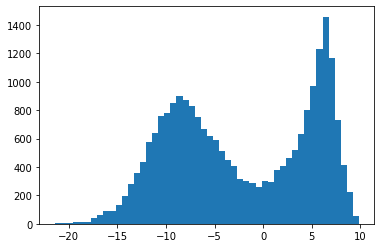

In [119]:
plt.hist(df1['E1'], bins = 50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

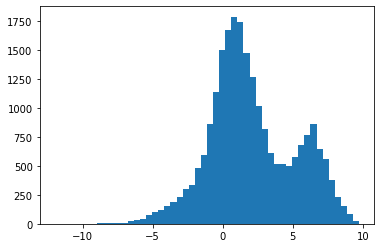

In [121]:
plt.hist(df1['A1'], bins = 50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

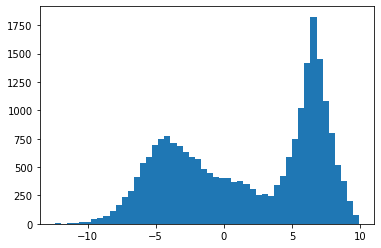

In [90]:
plt.hist(df1['F1'], bins = 50)
plt.show

In [ ]:
# def min_find (df1, A1):
#      arr = {'-5': 0,'-4': 0,'-3': 0,'-2': 0,'-1': 0,'0': 0,'1': 0,'2': 0,'3': 0,'4': 0,'5': 0}
#      for i in range(len(df1)):
#           if(df1.iloc[:,A1][i]>-5 and df1.iloc[:,A1][i]<-4): arr['-5']+=1
#           if(df1.iloc[:,A1][i]>-4 and df1.iloc[:,A1][i]<-3): arr['-4']+=1
#           if(df1.iloc[:,A1][i]>-3 and df1.iloc[:,A1][i]<-2): arr['-3']+=1
#           if(df1.iloc[:,A1][i]>-2 and df1.iloc[:,A1][i]<-1): arr['-2']+=1
#           if(df1.iloc[:,A1][i]>-1 and df1.iloc[:,A1][i]<0): arr['-1']+=1
#           if(df1.iloc[:,A1][i]>0 and df1.iloc[:,A1][i]<1): arr['0']+=1
#           if(df1.iloc[:,A1][i]>1 and df1.iloc[:,A1][i]<2): arr['1']+=1
#           if(df1.iloc[:,A1][i]>2 and df1.iloc[:,A1][i]<3): arr['2']+=1
#           if(df1.iloc[:,A1][i]>3 and df1.iloc[:,A1][i]<4): arr['3']+=1
#           if(df1.iloc[:,A1][i]>4 and df1.iloc[:,A1][i]<5): arr['4']+=1
#           if(df1.iloc[:,A1][i]>5 and df1.iloc[:,A1][i]<6): arr['5']+=1
#      ans = min(arr['-5'],arr['-4'],arr['-3'],arr['-2'],arr['-1'],arr['0'],arr['1'],arr['2'],arr['3'],arr['4'],arr['5'])
#      if arr['-5'] == ans: return -4.5
#      if arr['-4'] == ans: return -3.5
#      if arr['-3'] == ans: return -2.5
#      if arr['-2'] == ans: return -1.5
#      if arr['-1'] == ans: return -0.5
#      if arr['0'] == ans: return 0.5
#      if arr['1'] == ans: return 1.5
#      if arr['2'] == ans: return 2.5
#      if arr['3'] == ans: return 3.5
#      if arr['4'] == ans: return 4.5
#      if arr['5'] == ans: return 5.5
